# Space X  Falcon 9 First Stage Landing Prediction


My goal with this project is to create a machine learning pipeline that predicts whether the first stage of a Falcon 9 rocket will successfully land, based on data from previous labs. SpaceX markets Falcon 9 rocket launches at a cost of $62 million on its website, significantly lower than other providers, who charge upwards of $165 million. A key factor in these cost savings is SpaceX's ability to reuse the first stage of the rocket. Understanding the likelihood of a successful first stage landing is crucial for determining the cost of a launch. This analysis is particularly valuable for alternative companies considering bidding against SpaceX for rocket launch contracts.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Examples of unsuccessful landings:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most of these unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

1. Obtain a large classification database. The database needs to have at least 2 classes, more than 5 features and over 200 samples.
2. Provide a description of the dataset used including explanation of various features.
3. Pre-process and clean the dataset as appropriate.
4. Use following approaches for classification of the dataset:
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * SGD
    * SVM
5. Use GridSearchCV to tune the parameter of each of the above models. Can you obtain better results in this step for any of the models? Discuss your observations.
6. Randomly (or based on certain hypothesis) remove some features and re-evaluate the models. Document your observations with respect to models performances.


### Import Libraries and Define Auxiliary Functions


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report


### Load the dataframe


In [119]:
prep_df = pd.read_csv('spacex_2024_preprocessed.csv')
prep_df.head()

,Flight_No.,Payload_mass(kg),CCSFS,KSC,VSFB,Ballistic lunar transfer (BLT),GTO,Heliocentric,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital,Class
0,1.0,6104.959412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create X and y

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [120]:
X = prep_df.drop('Class', axis=1)
X.head()

,Flight_No.,Payload_mass(kg),CCSFS,KSC,VSFB,Ballistic lunar transfer (BLT),GTO,Heliocentric,LEO,MEO,Polar,Retrograde,SSO,Sub-orbital
0,1.0,6104.959412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
y = prep_df['Class'].to_numpy()


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [122]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X[0:1]

array([[-1.73940822, -0.73920704,  0.88113422, -0.53692484, -0.52068331,
        -0.28150539, -0.44345543, -0.08391814,  0.8502303 , -0.16963779,
        -0.20927403, -0.10295973, -0.30265996, -0.08391814]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


### Split X and y

Use the function train_test_split to split the data X and y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=2)
y_test.shape

(58,)

### Let's define some helper functions

In [124]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

def plot_roc_auc(y_test, y_predict):
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def print_score(model, X_test, y_test):    
    print("Score for base", model.__class__.__name__, ":", model.score(X_test, y_test))

    # print F1 score
    y_predict = model.predict(X_test)
    f1 = f1_score(y_test, y_predict)
    print("F1 score for base",model.__class__.__name__, f1)

    # print accuracy
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print("Accuracy for base", model.__class__.__name__, accuracy)

    # print precision
    precision = precision_score(y_test, y_predict)
    print("Precision for base", model.__class__.__name__, precision)

    # print recall
    recall = recall_score(y_test, y_predict)
    print("Recall for base", model.__class__.__name__, recall)

    # show the classification report
    print("Classification report for base", model.__class__.__name__)
    print(classification_report(y_test, y_predict))

    # Plot display the confusion matrix
    y_predict = model.predict(X_test)
    plot_confusion_matrix(y_test, y_predict)

    # Plot ROC AUC
    plot_roc_auc(y_test, y_predict)
    

def print_grid_search_metrics(gs, X_test, y_test):
    print("Accuracies with GridSearchCV:")
    
    print ("Tuned hyperparameters (best parameters): ", gs.best_params_)
    print ("Best score: ", gs.best_score_)

    best_estimator = gs.best_estimator_
    print("Best estimator score:", best_estimator.score(X_test, y_test))

    # print F1 score
    y_predict = best_estimator.predict(X_test)
    f1 = f1_score(y_test, y_predict)
    print("F1 score for best estimator", f1)

    # print accuracy
    y_predict = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print("Accuracy for best estimator", accuracy)

    # print precision
    precision = precision_score(y_test, y_predict)
    print("Precision for best estimator", precision)

    # print recall
    recall = recall_score(y_test, y_predict)
    print("Recall for best estimator", recall)

    # show the classification report
    print("Classification report with GridSearchCV:")
    print(classification_report(y_test, y_predict))

    # Plot the confusion matrix
    yhat = gs.predict(X_test)
    plot_confusion_matrix(y_test, yhat)

    # Plot ROC AUC
    plot_roc_auc(y_test, y_predict)


---

## A. Logistic Regression

### Use logistic regression to classify the dataset

In [125]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Show accuracy results

Score for base LogisticRegression : 0.9310344827586207
F1 score for base LogisticRegression 0.9622641509433962
Accuracy for base LogisticRegression 0.9310344827586207
Precision for base LogisticRegression 0.9272727272727272
Recall for base LogisticRegression 1.0
Classification report for base LogisticRegression
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.93      1.00      0.96        51

    accuracy                           0.93        58
   macro avg       0.96      0.71      0.78        58
weighted avg       0.94      0.93      0.92        58



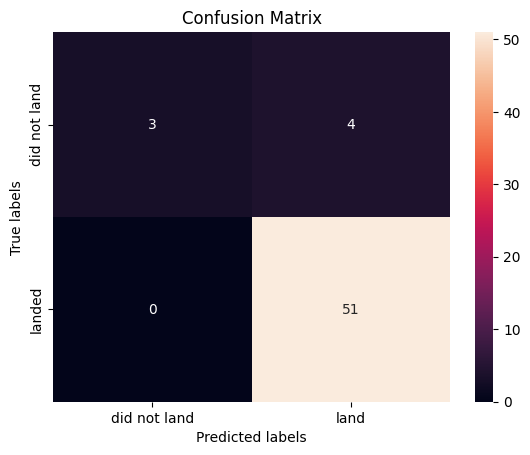

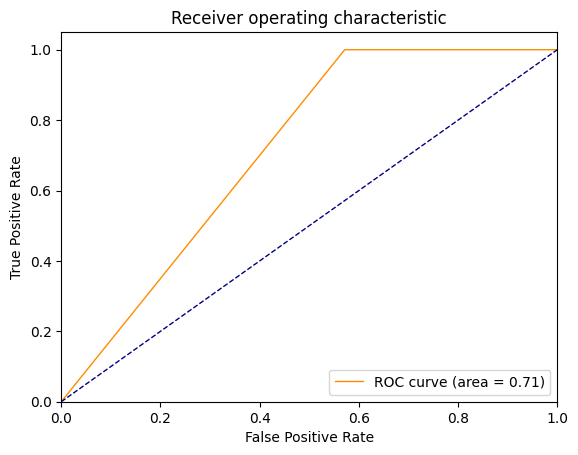

In [126]:
print_score(lr, X_test, y_test)

## A. Logistic Regression

### Use GridSearchCV to tune the parameters of the logistic regression model

In [127]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

### Show results with GridSearchCV

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.8861660079051383
Best estimator score: 0.8793103448275862
F1 score for best estimator 0.9357798165137615
Accuracy for best estimator 0.8793103448275862
Precision for best estimator 0.8793103448275862
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.88      1.00      0.94        51

    accuracy                           0.88        58
   macro avg       0.44      0.50      0.47        58
weighted avg       0.77      0.88      0.82        58



/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined an

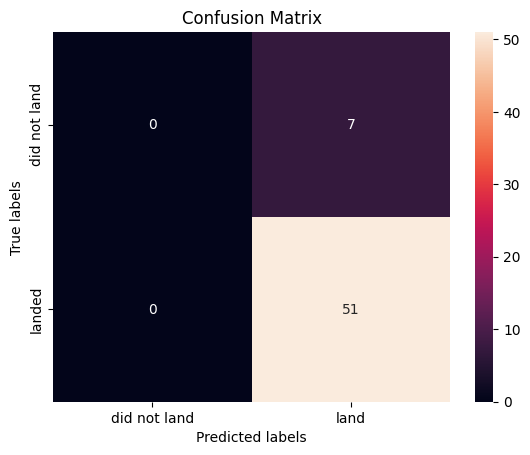

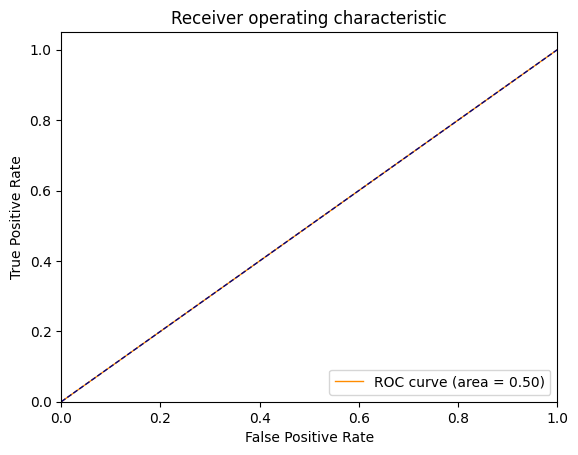

In [128]:
print_grid_search_metrics(logreg_cv, X_test, y_test)

## A. Logistic Regression Observations

* Regular LR has better confusion matrix performance than GridSearchCV
* Regular LR also has better accuracy score

---

## B. Decision Tree

### Use decision tree to classify the dataset

In [129]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

### Show accuracy results

Score for base DecisionTreeClassifier : 0.896551724137931
F1 score for base DecisionTreeClassifier 0.9411764705882353
Accuracy for base DecisionTreeClassifier 0.896551724137931
Precision for base DecisionTreeClassifier 0.9411764705882353
Recall for base DecisionTreeClassifier 0.9411764705882353
Classification report for base DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57         7
         1.0       0.94      0.94      0.94        51

    accuracy                           0.90        58
   macro avg       0.76      0.76      0.76        58
weighted avg       0.90      0.90      0.90        58



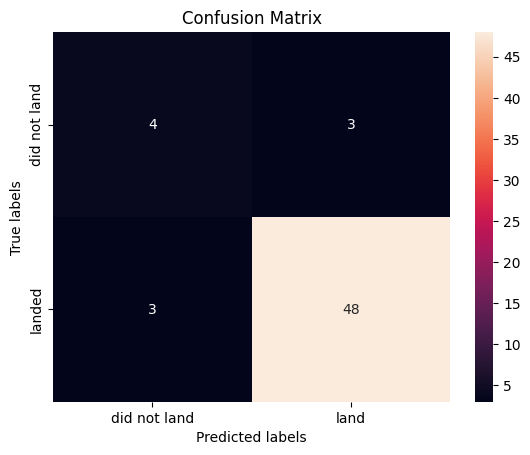

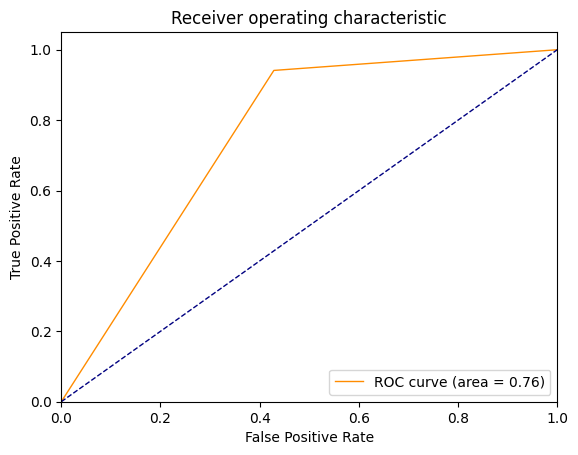

In [130]:
print_score(tree, X_test, y_test)

## B. Decision Tree

### Use GridSearchCV to tune the parameters of the decision tree model

In [131]:
# Define a different parameter grid for DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 5, 10 ],
              'max_features': [None, 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10,15,20]}
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']})

### Show results with GridSearchCV

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}
Best score:  0.916798418972332
Best estimator score: 0.9137931034482759
F1 score for best estimator 0.9523809523809523
Accuracy for best estimator 0.9137931034482759
Precision for best estimator 0.9259259259259259
Recall for best estimator 0.9803921568627451
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55         7
         1.0       0.93      0.98      0.95        51

    accuracy                           0.91        58
   macro avg       0.84      0.70      0.75        58
weighted avg       0.90      0.91      0.90        58



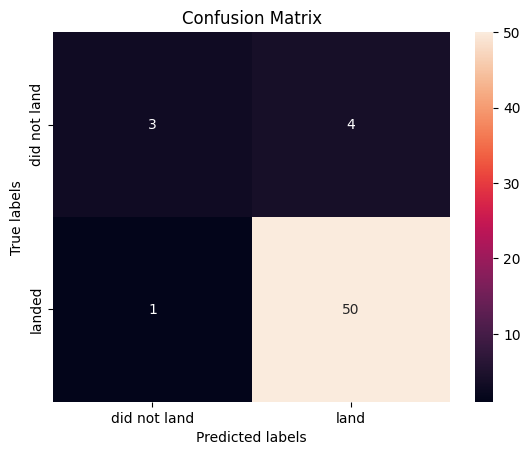

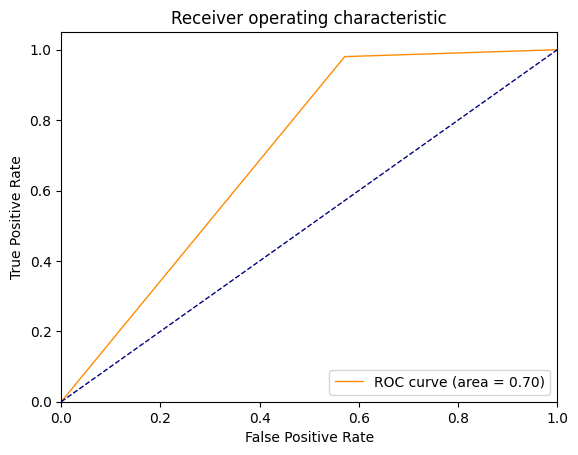

In [132]:
print_grid_search_metrics(tree_cv, X_test, y_test)

## B. Decision Tree Observations

* Both regular DT and GridSearchCV DT have good confusion matrix performance but GridSearchCV DT outperforms the regular DT
* GridSearchCV has significantly higher accuracy than regular DT

---

## C. Random Forest

### Use random forest to classify the dataset

In [133]:
# Create a RandomForestClassifier for predicting the success of rocket launches
rocket_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
rocket_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Show accuracy results

Score for base RandomForestClassifier : 0.9137931034482759
F1 score for base RandomForestClassifier 0.9514563106796117
Accuracy for base RandomForestClassifier 0.9137931034482759
Precision for base RandomForestClassifier 0.9423076923076923
Recall for base RandomForestClassifier 0.9607843137254902
Classification report for base RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.62         7
         1.0       0.94      0.96      0.95        51

    accuracy                           0.91        58
   macro avg       0.80      0.77      0.78        58
weighted avg       0.91      0.91      0.91        58



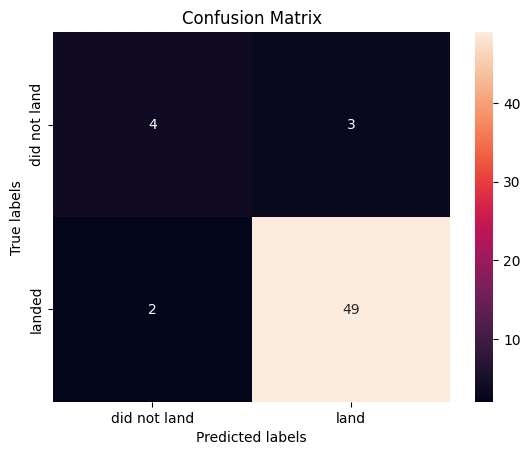

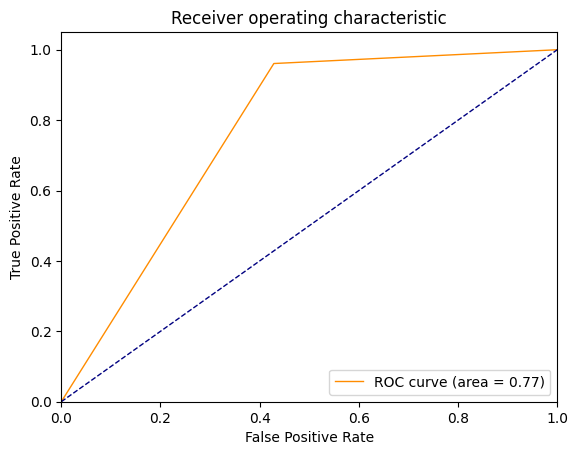

In [134]:
print_score(rocket_forest, X_test, y_test)

## C. Random Forest

### Use GridSearchCV to tune the parameters of the random forest model

In [135]:
# Define a parameter grid for hyperparameter tuning using GridSearchCV
param_grid_forest = {
    'n_estimators': [50, 100],            # Number of trees in the forest                                   #I could use 200 for the good accuracy but it was giving me hard time to execute 
    'max_depth': [None, 10],              # Maximum depth of the tree                                       #30, 40...
    'min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node    #10, 20...
    'min_samples_leaf': [1, 2],           # Minimum number of samples required to be at a leaf node         #4, 5...
    'max_features': ['sqrt']              # Maximum number of features to consider for the best split       #log2...
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search_forest = GridSearchCV(estimator=rocket_forest, param_grid=param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

### Show results with GridSearchCV

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.9166183574879228
Best estimator score: 0.9310344827586207
F1 score for best estimator 0.9622641509433962
Accuracy for best estimator 0.9310344827586207
Precision for best estimator 0.9272727272727272
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.93      1.00      0.96        51

    accuracy                           0.93        58
   macro avg       0.96      0.71      0.78        58
weighted avg       0.94      0.93      0.92        58



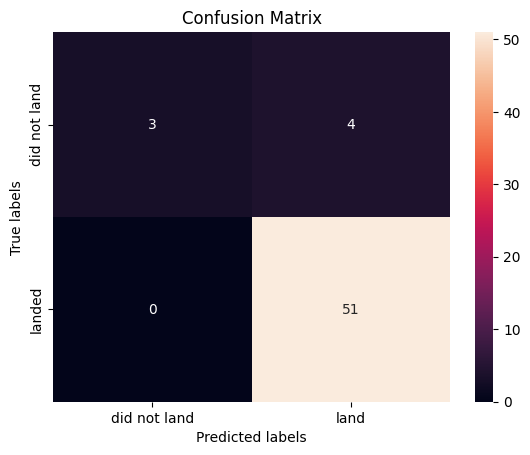

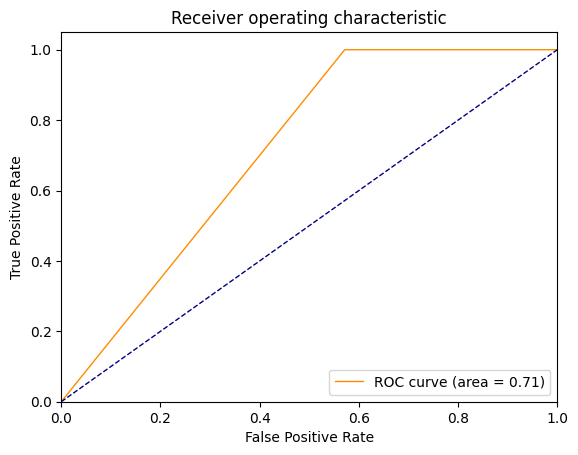

In [136]:
print_grid_search_metrics(grid_search_forest, X_test, y_test)

## C. Random Forest Observations

* GridSearchCV Random Forest has a better confusion matrix
* GridSearchCV Random Forest also has higher accuracy than regular RF

---

## D. Stochastic Gradient Descent

### Use stochastic gradient descent, to classify the dataset

In [137]:
# Create an SGDClassifier object
rocket_classifier = SGDClassifier(random_state=42)

# Train the model
rocket_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

### Show accuracy results

Score for base SGDClassifier : 0.8620689655172413
F1 score for base SGDClassifier 0.9245283018867925
Accuracy for base SGDClassifier 0.8620689655172413
Precision for base SGDClassifier 0.8909090909090909
Recall for base SGDClassifier 0.9607843137254902
Classification report for base SGDClassifier
              precision    recall  f1-score   support

         0.0       0.33      0.14      0.20         7
         1.0       0.89      0.96      0.92        51

    accuracy                           0.86        58
   macro avg       0.61      0.55      0.56        58
weighted avg       0.82      0.86      0.84        58



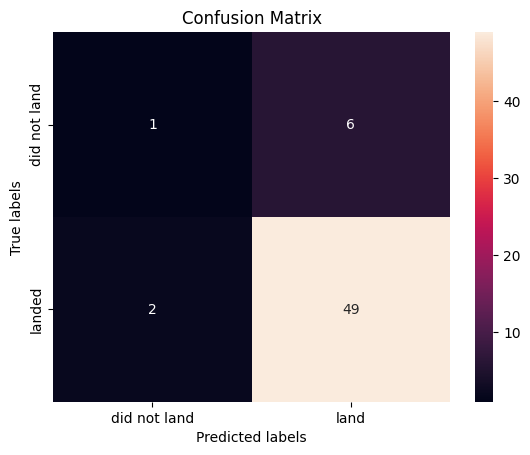

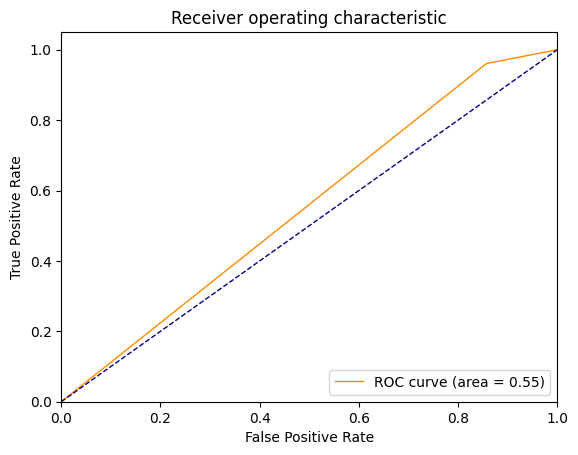

In [138]:
print_score(rocket_classifier, X_test, y_test)

## D. Stochastic Gradient Descent

### Use GridSearchCV to tune the parameters of the SGD

In [139]:
# Define the parameter grid for grid search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter':[1000, 2000, 3000],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search_rocket = GridSearchCV(estimator=rocket_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rocket.fit(X_train, y_train)

/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Grou

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

### Show results with GridSearchCV

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'alpha': 0.1, 'loss': 'perceptron', 'max_iter': 1000, 'penalty': 'l2'}
Best score:  0.9033816425120772
Best estimator score: 0.9482758620689655
F1 score for best estimator 0.9714285714285714
Accuracy for best estimator 0.9482758620689655
Precision for best estimator 0.9444444444444444
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.94      1.00      0.97        51

    accuracy                           0.95        58
   macro avg       0.97      0.79      0.85        58
weighted avg       0.95      0.95      0.94        58



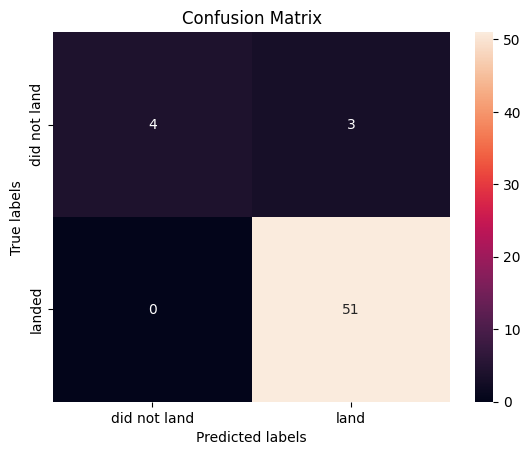

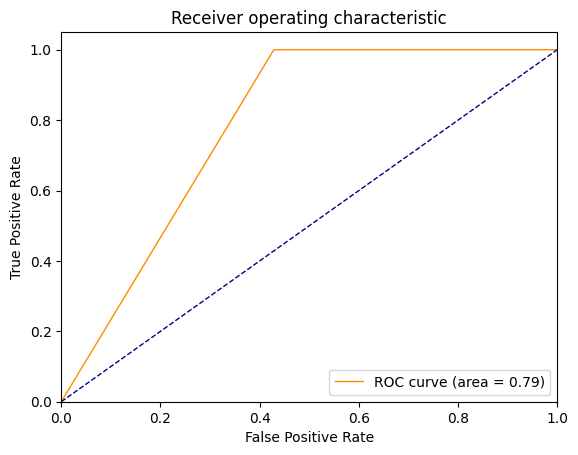

In [140]:
print_grid_search_metrics(grid_search_rocket, X_test, y_test)

## D. Stochastic Gradient Descent Observations

* SGD with GridSearchCV has better confusion matrix performance
* SGD with GridSearchCV also has higher accuracy score

---

## E. Support Vector Machine

### Use SVM to classify the dataset

In [141]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

### Show accuracy results

/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined an

Score for base SVC : 0.8793103448275862
F1 score for base SVC 0.9357798165137615
Accuracy for base SVC 0.8793103448275862
Precision for base SVC 0.8793103448275862
Recall for base SVC 1.0
Classification report for base SVC
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.88      1.00      0.94        51

    accuracy                           0.88        58
   macro avg       0.44      0.50      0.47        58
weighted avg       0.77      0.88      0.82        58



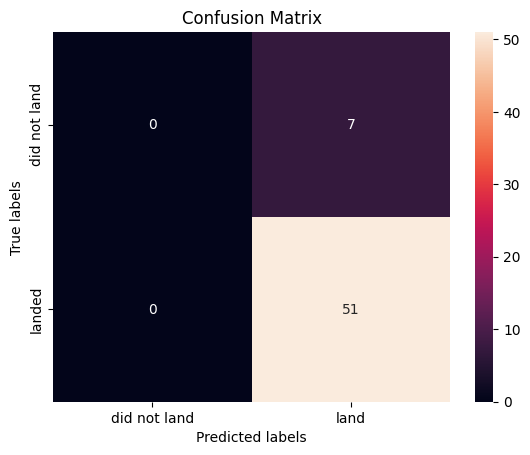

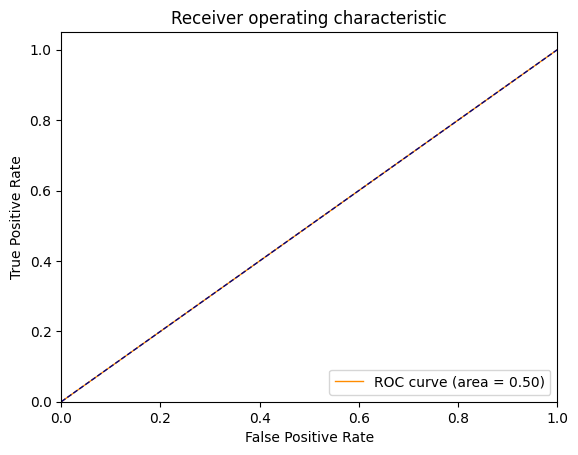

In [142]:
print_score(svm_model, X_test, y_test)

## E. Support Vector Machine

### Use GridSearchCV to tune the parameters of the SVM model

In [143]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.logspace(-2, 2, 5),  # Different range for 'C'
              'gamma': np.logspace(-4, 0, 5)} 
svm_grid = SVC()  # You can use the same model as above or create a new one
svm_cv = GridSearchCV(svm_grid, parameters, cv=10, n_jobs=-1)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

### Show results with GridSearchCV

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score:  0.8861660079051383
Best estimator score: 0.8793103448275862
F1 score for best estimator 0.9357798165137615
Accuracy for best estimator 0.8793103448275862
Precision for best estimator 0.8793103448275862
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.88      1.00      0.94        51

    accuracy                           0.88        58
   macro avg       0.44      0.50      0.47        58
weighted avg       0.77      0.88      0.82        58



/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined an

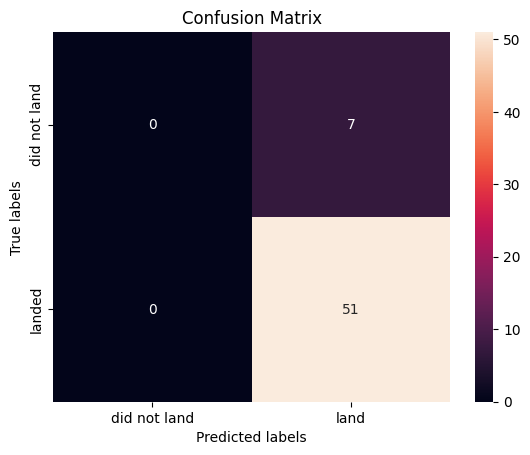

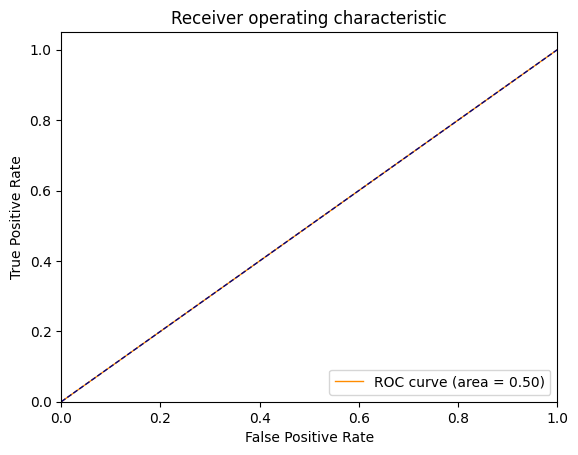

In [144]:
print_grid_search_metrics(svm_cv, X_test, y_test)

## E. Support Vector Machine Observations

* Both models have the same confusion matrix performance
* SVM with GridSearchCV has better "best score" but both models have the same best estimator score and regular score
* The model overall is accurate but there is an issue with capturing instances of class 0. This also indicates that the model is facing the problem to properly identifying and or predicting instances of class 0. The recall and the f1-score shows 0.00 highlighting this problem.
* For class 1 ,the model performs well looking at the recall and f1-score.
* The macro avg shows a lower recall,indicating that the model is struggling with overall recall due to the imbalance in the classes
* Gridseach did not help to increase the performace of the model as compared to the default SVM.

---

## Refitting Models With Some Features Removed

### Let's drop some features and reproduce the steps previously

In [145]:
features_dropped_X = prep_df.drop(['Class', 'Ballistic lunar transfer (BLT)', 'Heliocentric', 'MEO', 'Polar', 'Retrograde'], axis=1)
features_dropped_X.head()

,Flight_No.,Payload_mass(kg),CCSFS,KSC,VSFB,GTO,LEO,SSO,Sub-orbital
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [146]:
features_dropped_X = transform.fit(features_dropped_X).transform(features_dropped_X)
features_dropped_X[0:1]

array([[-1.73940822, -0.73920704,  0.88113422, -0.53692484, -0.52068331,
        -0.44345543,  0.8502303 , -0.30265996, -0.08391814]])

In [147]:
#split the reduced feature dataset
features_dropped_X_train, features_dropped_X_test, Y_train, Y_test = train_test_split( features_dropped_X, y, test_size=0.2, stratify=y, random_state=2)

## A. Linear Regression

In [148]:
lr = LogisticRegression()
lr.fit(features_dropped_X_train,y_train)

LogisticRegression()

Score for base LogisticRegression : 0.9310344827586207
F1 score for base LogisticRegression 0.9622641509433962
Accuracy for base LogisticRegression 0.9310344827586207
Precision for base LogisticRegression 0.9272727272727272
Recall for base LogisticRegression 1.0
Classification report for base LogisticRegression
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.93      1.00      0.96        51

    accuracy                           0.93        58
   macro avg       0.96      0.71      0.78        58
weighted avg       0.94      0.93      0.92        58



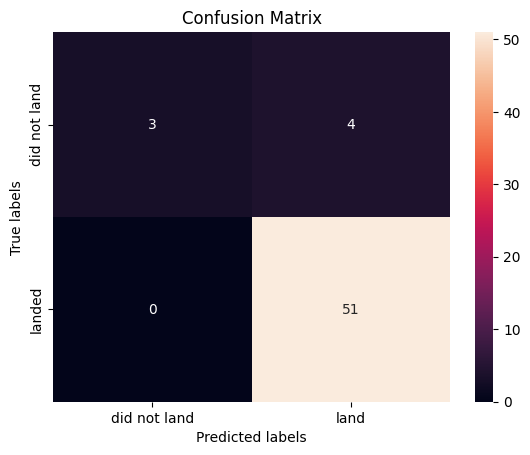

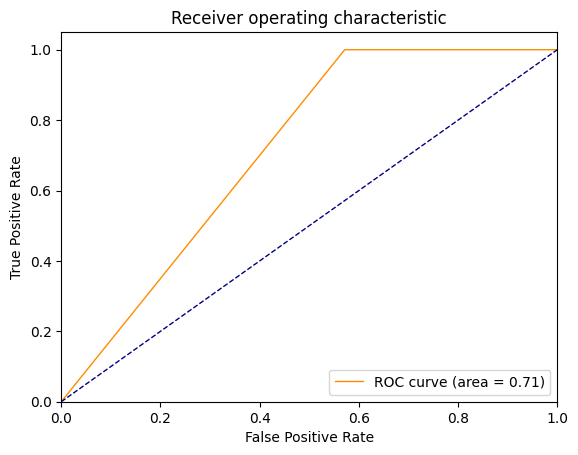

In [149]:
print_score(lr, features_dropped_X_test, y_test)

In [150]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(features_dropped_X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.8901185770750988
Best estimator score: 0.9310344827586207
F1 score for best estimator 0.9622641509433962
Accuracy for best estimator 0.9310344827586207
Precision for best estimator 0.9272727272727272
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.93      1.00      0.96        51

    accuracy                           0.93        58
   macro avg       0.96      0.71      0.78        58
weighted avg       0.94      0.93      0.92        58



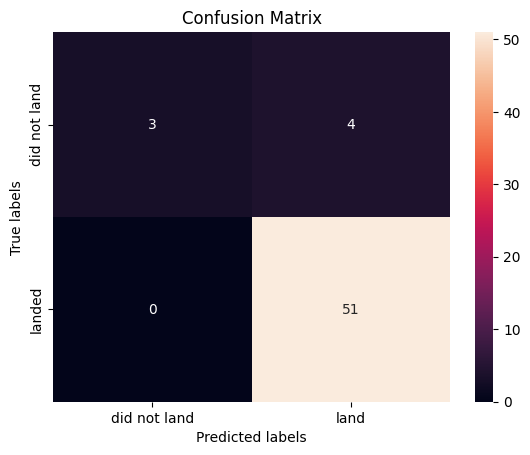

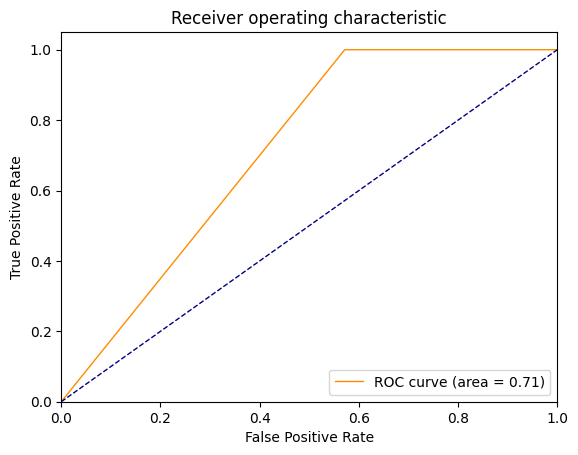

In [151]:
print_grid_search_metrics(logreg_cv, features_dropped_X_test, y_test)

## B. Decision Tree

In [152]:
tree = DecisionTreeClassifier()
tree.fit(features_dropped_X_train,Y_train)

DecisionTreeClassifier()

Score for base DecisionTreeClassifier : 0.8620689655172413
F1 score for base DecisionTreeClassifier 0.92
Accuracy for base DecisionTreeClassifier 0.8620689655172413
Precision for base DecisionTreeClassifier 0.9387755102040817
Recall for base DecisionTreeClassifier 0.9019607843137255
Classification report for base DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       0.44      0.57      0.50         7
         1.0       0.94      0.90      0.92        51

    accuracy                           0.86        58
   macro avg       0.69      0.74      0.71        58
weighted avg       0.88      0.86      0.87        58



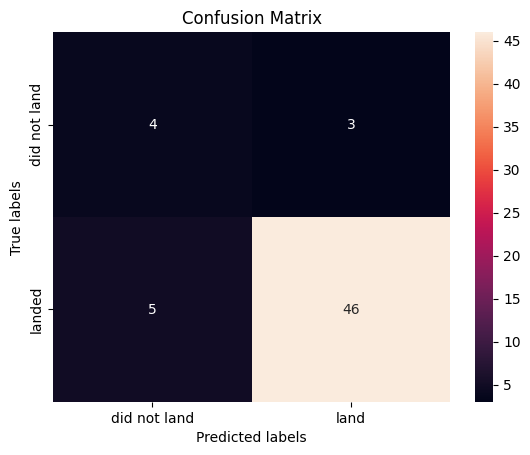

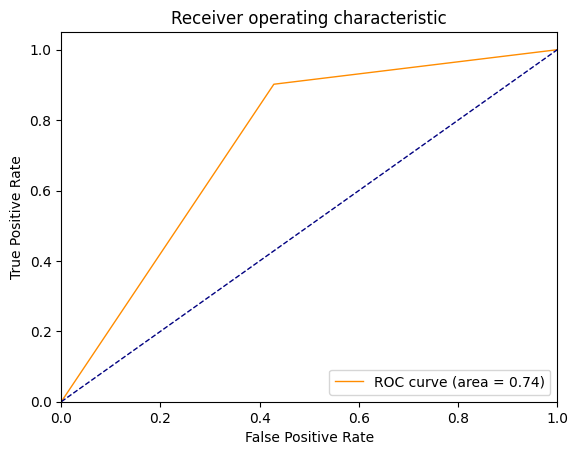

In [153]:
print_score(tree, features_dropped_X_test, y_test)

In [154]:
# Define a different parameter grid for DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 5, 10 ],
              'max_features': [None, 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10,15,20]}
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(features_dropped_X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']})

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 15, 'splitter': 'best'}
Best score:  0.9213438735177866
Best estimator score: 0.896551724137931
F1 score for best estimator 0.9444444444444444
Accuracy for best estimator 0.896551724137931
Precision for best estimator 0.8947368421052632
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25         7
         1.0       0.89      1.00      0.94        51

    accuracy                           0.90        58
   macro avg       0.95      0.57      0.60        58
weighted avg       0.91      0.90      0.86        58



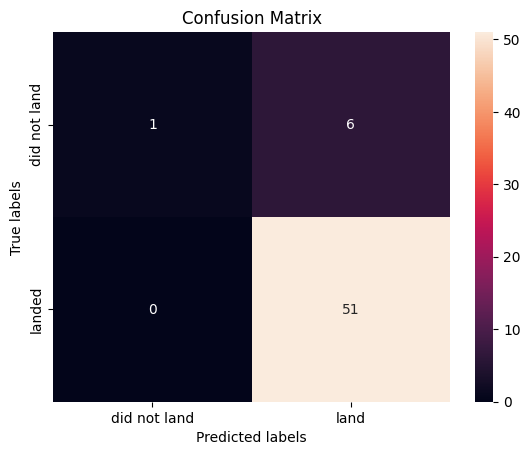

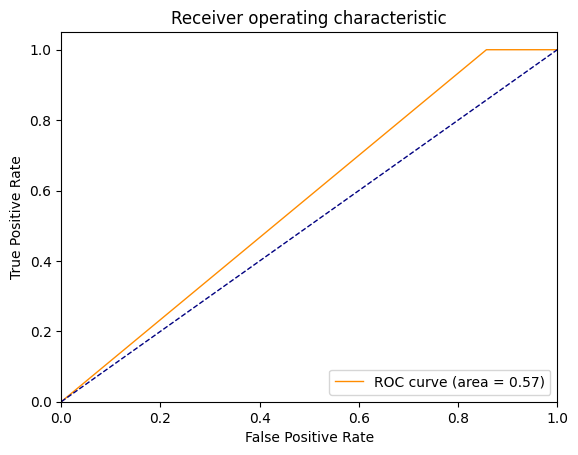

In [155]:
print_grid_search_metrics(tree_cv, features_dropped_X_test, y_test)

## C. Random Forest

In [156]:
# Create a RandomForestClassifier for predicting the success of rocket launches
rocket_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
rocket_forest.fit(features_dropped_X_train, y_train)

RandomForestClassifier(random_state=42)

Score for base RandomForestClassifier : 0.896551724137931
F1 score for base RandomForestClassifier 0.9423076923076923
Accuracy for base RandomForestClassifier 0.896551724137931
Precision for base RandomForestClassifier 0.9245283018867925
Recall for base RandomForestClassifier 0.9607843137254902
Classification report for base RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50         7
         1.0       0.92      0.96      0.94        51

    accuracy                           0.90        58
   macro avg       0.76      0.69      0.72        58
weighted avg       0.89      0.90      0.89        58



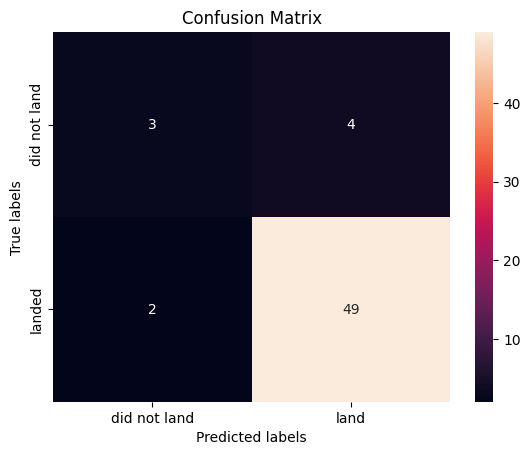

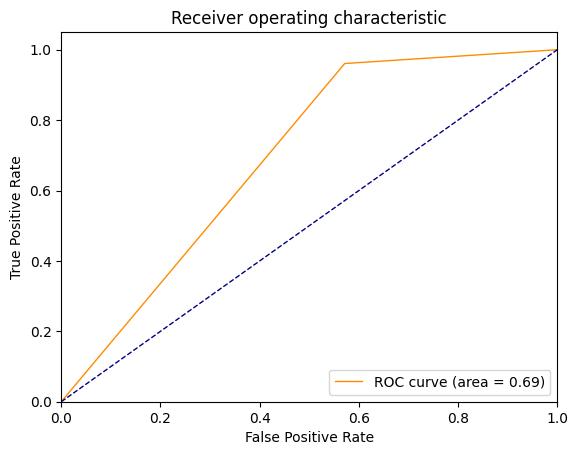

In [157]:
print_score(rocket_forest, features_dropped_X_test, y_test)

In [158]:
# Define a parameter grid for hyperparameter tuning using GridSearchCV
param_grid_forest = {
    'n_estimators': [50, 100],            # Number of trees in the forest                                   #I could use 200 for the good accuracy but it was giving me hard time to execute 
    'max_depth': [None, 10],              # Maximum depth of the tree                                       #30, 40...
    'min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node    #10, 20...
    'min_samples_leaf': [1, 2],           # Minimum number of samples required to be at a leaf node         #4, 5...
    'max_features': ['sqrt']              # Maximum number of features to consider for the best split       #log2...
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search_forest = GridSearchCV(estimator=rocket_forest, param_grid=param_grid_forest, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_forest.fit(features_dropped_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score:  0.9209661835748791
Best estimator score: 0.9137931034482759
F1 score for best estimator 0.9532710280373832
Accuracy for best estimator 0.9137931034482759
Precision for best estimator 0.9107142857142857
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.29      0.44         7
         1.0       0.91      1.00      0.95        51

    accuracy                           0.91        58
   macro avg       0.96      0.64      0.70        58
weighted avg       0.92      0.91      0.89        58



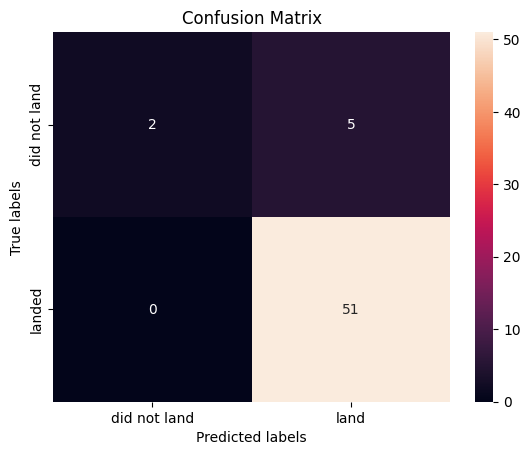

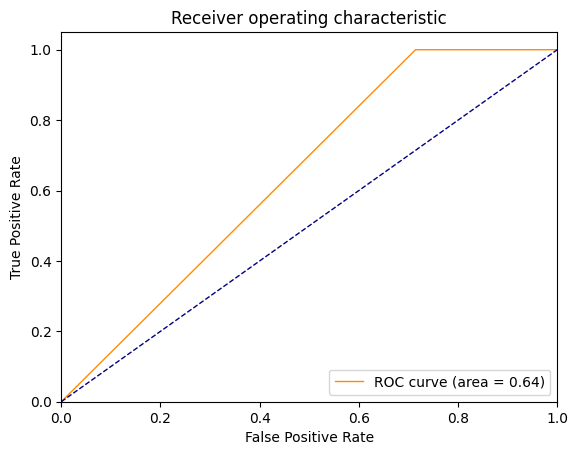

In [159]:
print_grid_search_metrics(grid_search_forest, features_dropped_X_test, y_test)

## D. Stochastic Gradient Descent

In [160]:
# Create an SGDClassifier object
rocket_classifier = SGDClassifier(random_state=42)

# Train the model
rocket_classifier.fit(features_dropped_X_train, y_train)

SGDClassifier(random_state=42)

Score for base SGDClassifier : 0.8620689655172413
F1 score for base SGDClassifier 0.9245283018867925
Accuracy for base SGDClassifier 0.8620689655172413
Precision for base SGDClassifier 0.8909090909090909
Recall for base SGDClassifier 0.9607843137254902
Classification report for base SGDClassifier
              precision    recall  f1-score   support

         0.0       0.33      0.14      0.20         7
         1.0       0.89      0.96      0.92        51

    accuracy                           0.86        58
   macro avg       0.61      0.55      0.56        58
weighted avg       0.82      0.86      0.84        58



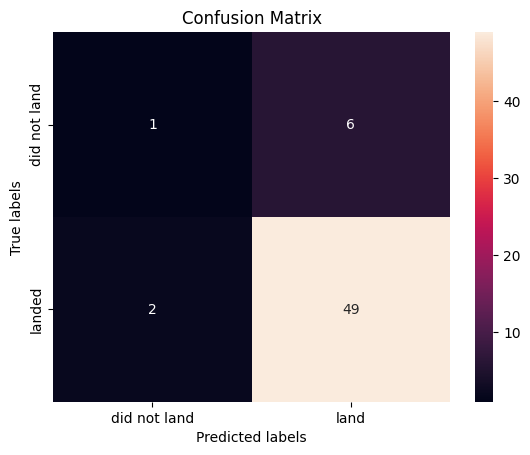

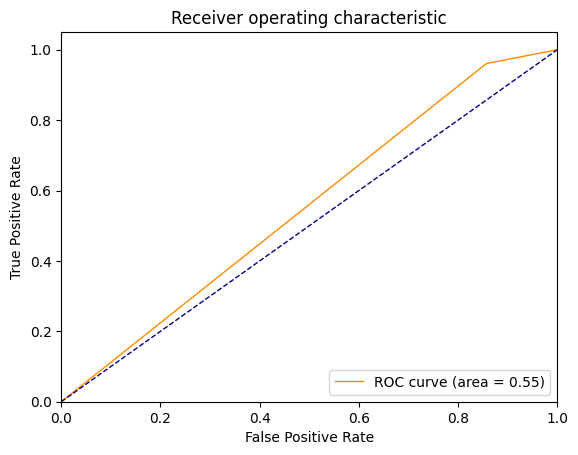

In [161]:
print_score(rocket_classifier, features_dropped_X_test, y_test)

In [162]:
# Define the parameter grid for grid search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter':[1000, 2000, 3000],
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search_rocket = GridSearchCV(estimator=rocket_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_rocket.fit(features_dropped_X_train, y_train)

/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Grou

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'alpha': 0.1, 'loss': 'perceptron', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best score:  0.898937198067633
Best estimator score: 0.9310344827586207
F1 score for best estimator 0.9622641509433962
Accuracy for best estimator 0.9310344827586207
Precision for best estimator 0.9272727272727272
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60         7
         1.0       0.93      1.00      0.96        51

    accuracy                           0.93        58
   macro avg       0.96      0.71      0.78        58
weighted avg       0.94      0.93      0.92        58



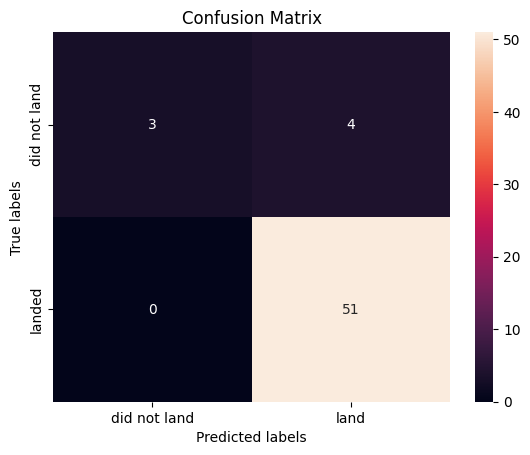

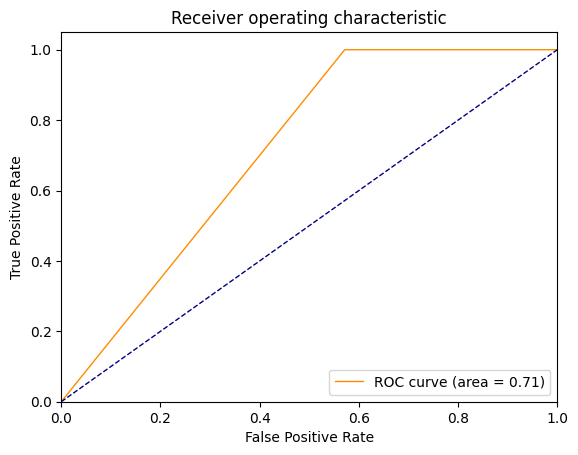

In [163]:
print_grid_search_metrics(grid_search_rocket, features_dropped_X_test, y_test)

__Linear Regression__<br>
Original Dataset: 0.9310344827586207 => GridSearchCV => 0.8861660079051383<br>
Feature Removed: 0.9310344827586207 => GridSearchCV => 0.8901185770750988<br>

The default hyperparameters performed the same. GridSearchCV() found parameters performed slightly better with less features but still performed worse than the default hyperparameters.<br>


__Decision Tree__<br>
Original Dataset: 0.896551724137931 => GridSearchCV => 0.9666666666666668<br>
Feature Removed: 0.8793103448275862 => GridSearchCV => 0.9213438735177866<br>

By removing features from the dataset, the decision tree model performed worse as the test set score is more than 4% lower with the optimized hyperparameters. The removed features did play a role in the nodes for the tree search.

__Random Forest__<br>
Original Dataset: 0.9137931034482759 => GridSearchCV => 0.9166183574879228<br>
Feature Removed: 0.896551724137931 => GridSearchCV => 0.9209661835748791<br>

Although the original dataset performed better with default hyperparameters, the optimized hyperparameters worked better with the dataset with removed features.

__Stochastic Gradient Descent__<br>
Original Dataset: 0.8620689655172413 => GridSearchCV => 0.9033816425120772<br>
Feature Removed: 0.8620689655172413 => GridSearchCV => 0.9075362318840579<br>

The default hyperparameters performed the same. GridSearchCV() found hyperparameters performed slightly better with the reduced feature set.

__Support Vector Machine__<br>
Original Dataset: 0.8793103448275862 => GridSearchCV => 0.8793103448275862<br>
Feature Removed: 0.8793103448275862 => GridSearchCV => 0.8793103448275862<br>

There was no difference. Perhaps those removed features were not used in the search.

__Comclusion for Task 6__
By looking at all the scores, it can be concluded that removing features from the dataset lowered the score of the best model. The best model, decision tree with optimized hyperparameters went from 96.6% to 92.1%. 




## E. Support Vector Machine

In [164]:
svm_model = SVC()
svm_model.fit(features_dropped_X_train,y_train)

SVC()

/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined an

Score for base SVC : 0.8793103448275862
F1 score for base SVC 0.9357798165137615
Accuracy for base SVC 0.8793103448275862
Precision for base SVC 0.8793103448275862
Recall for base SVC 1.0
Classification report for base SVC
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.88      1.00      0.94        51

    accuracy                           0.88        58
   macro avg       0.44      0.50      0.47        58
weighted avg       0.77      0.88      0.82        58



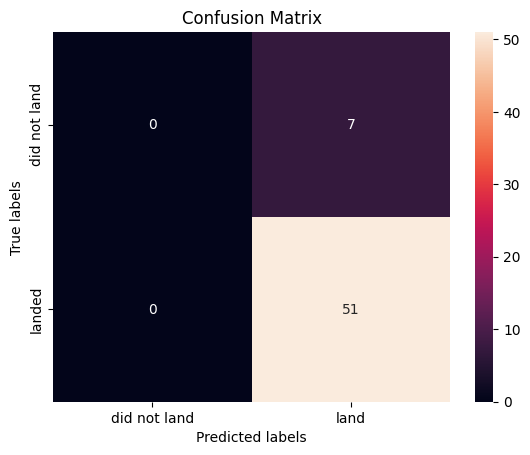

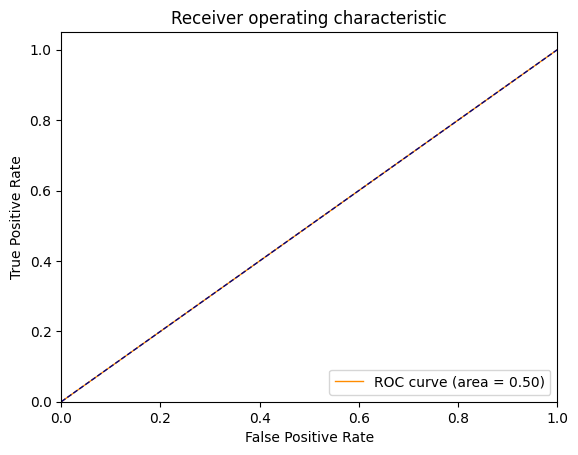

In [165]:
print_score(svm_model, features_dropped_X_test, y_test)

In [166]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.logspace(-2, 2, 5),  # Different range for 'C'
              'gamma': np.logspace(-4, 0, 5)} 
svm_grid = SVC()  # You can use the same model as above or create a new one
svm_cv = GridSearchCV(svm_grid, parameters, cv=10, n_jobs=-1)
svm_cv.fit(features_dropped_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

Accuracies with GridSearchCV:
Tuned hyperparameters (best parameters):  {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score:  0.8861660079051383
Best estimator score: 0.8793103448275862
F1 score for best estimator 0.9357798165137615
Accuracy for best estimator 0.8793103448275862
Precision for best estimator 0.8793103448275862
Recall for best estimator 1.0
Classification report with GridSearchCV:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.88      1.00      0.94        51

    accuracy                           0.88        58
   macro avg       0.44      0.50      0.47        58
weighted avg       0.77      0.88      0.82        58



/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rico/Desktop/GBC T431/Courses/Applied Math Concepts for ML/Group 1 Term Project/v/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined an

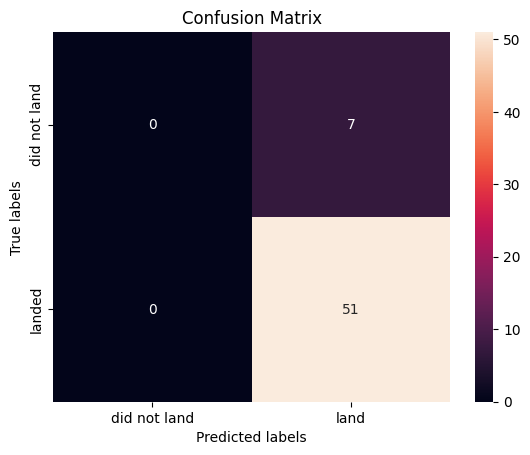

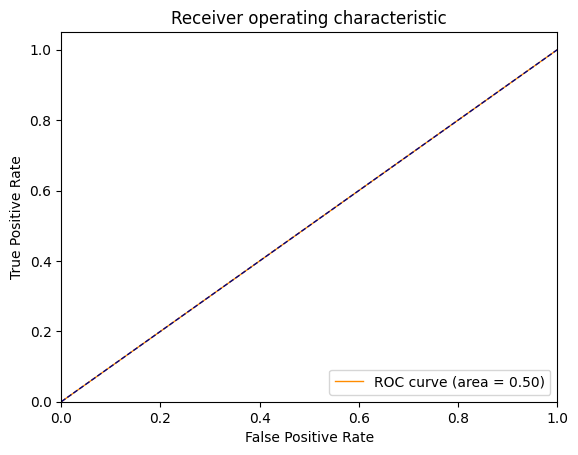

In [167]:
print_grid_search_metrics(svm_cv, features_dropped_X_test, y_test)